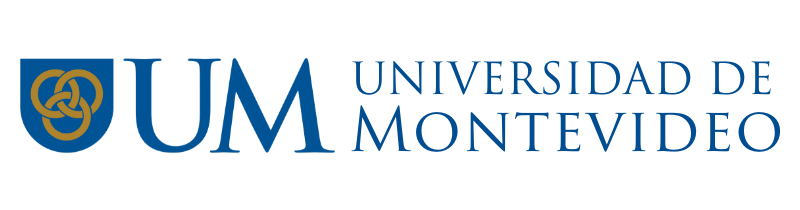

# Curso de Aprendizaje Automático

*Ejemplo basado en [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) de Jake VanderPlas; disponible en [GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*


# Clasificación Bayesina: Naive Bayes

In [1]:
# Importamos paquetes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Vamos a importar un conjunto de datos y graficarlos

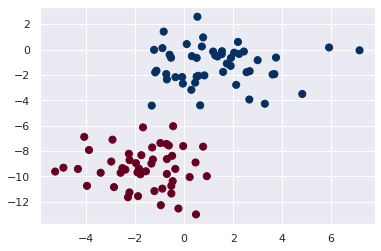

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

![(Ejecutar el código del apéndice para generar esta gráfica)](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.05-gaussian-NB.png?raw=1)
[Fuente de la figura en la sección apéndice](06.00-Figure-Code.ipynb#Gaussian-Naive-Bayes)

In [3]:
# Importamos el modelo Naive Bayes con distribución Gaussiana y entremos con 
# los datos X e Y
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);




In [ ]:
print (model.predict([[-2,-2]]))

Vamos a generar datos aleatorios para realizar predicciones

In [4]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Ahora podemos trazar estos nuevos datos para tener una idea de dónde está el límite de decisión:

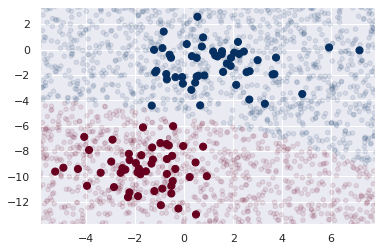

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

Una buena parte de este formalismo bayesiano es que permite la clasificación probabilística, que podemos calcular utilizando el método ***predict_proba***:

In [6]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(3)

array([[0.895, 0.105],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.153, 0.847]])

Las columnas dan las probabilidades posteriores para cada clase.
Si se están buscando estimaciones de incertidumbre en la clasificación, los enfoques bayesianos como este pueden ser un enfoque útil.

Por supuesto, la clasificación final será tan buena como los supuestos del modelo que la conducen, razón por la cual el modelo Naive-Bayes Gaussiano a puede que nos produzca muy buenos resultados.

Aún así, en muchos casos, especialmente a medida que aumenta el número de *features*, esta suposición puede no resultado muy perjudicial como para evitar que el método de Naive-Bayes sea un método útil.

## Vamos a partir el set de datos en entrenamiento y test, para luego generar la matriz de confusión

In [7]:
from sklearn.model_selection import train_test_split

# Partimos los dos arrays en entrenamiento
# Usamos la funcion train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=0)
y_score = model.fit(X_train, Y_train)



In [13]:
model.fit(X_train, Y_train);
#y_predict = model.predict(X_test)
y_predict = model.predict_proba(X_test)
print (y_predict)



[[1.75790638e-05 9.99982421e-01]
 [6.62589614e-10 9.99999999e-01]
 [9.08379172e-01 9.16208279e-02]
 [4.14053384e-06 9.99995859e-01]
 [2.17006342e-08 9.99999978e-01]
 [2.65002908e-06 9.99997350e-01]
 [9.99986196e-01 1.38042033e-05]
 [3.37786408e-08 9.99999966e-01]
 [9.99999775e-01 2.25180089e-07]
 [9.99999887e-01 1.13020293e-07]
 [2.02659492e-06 9.99997973e-01]
 [9.76716278e-01 2.32837222e-02]
 [9.99999549e-01 4.50966017e-07]
 [1.95497520e-09 9.99999998e-01]
 [5.12253528e-09 9.99999995e-01]
 [7.55227781e-09 9.99999992e-01]
 [2.40856228e-09 9.99999998e-01]
 [1.00000000e+00 1.39926086e-10]
 [9.99999997e-01 3.07915528e-09]
 [9.99985965e-01 1.40351323e-05]]


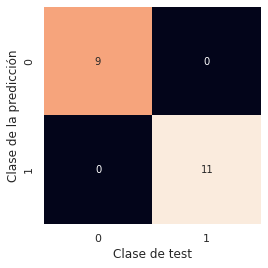

In [9]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase de test')
plt.ylabel('Clase de la predicción');

Calculamos el accuracy del modelo

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

accu_score = accuracy_score(Y_test, y_predict)
print (classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



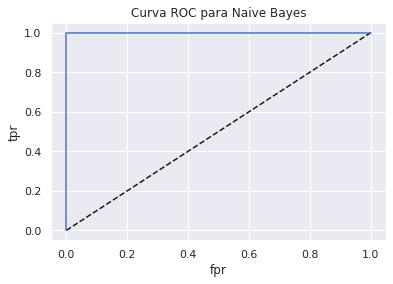

1.0


In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probas = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, probas[:, 1])

plt.plot([0,1],[0,1],'k--') #se grafica la linea diagonal
plt.plot(fpr, tpr, label='NB') #se grafica la curva ROC
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Curva ROC para Naive Bayes')
plt.show()

print(roc_auc_score(Y_test, probas[:, 1]))

## Regresión Logística

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

Función logística sigmodoide

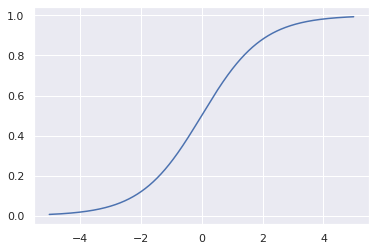

In [15]:
x = np.arange(-5, 5, 0.01) # Genero un vector con valores entre -5 y 5
plt.plot(x, 1/(1+np.exp(-x)))

<img src="https://drive.google.com/uc?export=view&id=1nnjm7QQh-uIFcPpn0NjQ8EIbYR4Meji2">
Figure:Scikit-learn.svg

Todos los modelos de clasificación soportados por Scikit-Learn siguen el flujo de trabajo presentado en el gráfico anterior. 

Generamos un conjunto de datos aleatorios

In [21]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)

Partimos nuestros datos en los conjuntos de entranemiento y test

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
# Importamos el módulo de Regración Logística
from sklearn.linear_model import LogisticRegression

Declaramos el modelo de regresión logística

In [30]:
model = LogisticRegression()

Invocamos a la función fit con el conjunto de datos de entrenamiento

In [33]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Invocamos a la función predict para hacer una predicción sobre los datos de test

In [39]:
y_predict = model.predict(X_test)

[0.00670497 1.99329503]


Tengo las etiquetas predichas (y_predict) y las etiquetas reales (y_test), puedo obtener métricas de mi modelo

Genero la matriz de confusión

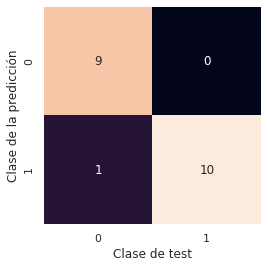

In [44]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase de test')
plt.ylabel('Clase de la predicción');

Dibujo la curva ROC y calculo la AUC

[1.99954770e+00 9.99547700e-01 8.03679622e-01 6.65954710e-01
 6.27072123e-01 9.01882507e-04]


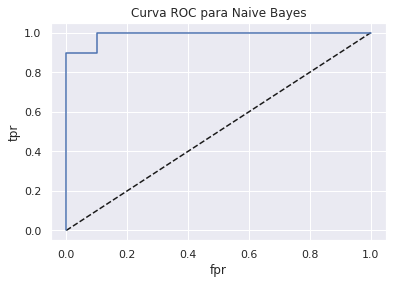

0.99


In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probas = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, probas[:, 1])

plt.plot([0,1],[0,1],'k--') #se grafica la linea diagonal
plt.plot(fpr, tpr, label='NB') #se grafica la curva ROC
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Curva ROC')
plt.show()

print(roc_auc_score(Y_test, probas[:, 1]))

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print (classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

